# Experiment No: 2
### **Aim:** To perform data cleaning, preprocessing, and visualization to prepare the Spambase dataset for machine learning tasks using Pandas and Matplotlib/Seaborn.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Fetch the dataset using the ID
spambase = fetch_ucirepo(id=94)
X = spambase.data.features
y = spambase.data.targets

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)
print(f"Dataset loaded: {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded: 4601 rows and 58 columns.


In [6]:
print("--- Data Cleaning & Preprocessing ---")

# 1. Check for missing values (Required: isnull, notnull)
print(f"Total null values found: {df.isnull().sum().sum()}")
print(f"Total non-null values found: {df.notnull().sum().sum()}")

# 2. Handling Nulls (Required: dropna, fillna)
# We use numeric_only=True to ensure we don't try to average non-numeric types
df_cleaned = df.dropna()
df_filled = df.fillna(df.mean(numeric_only=True))

# 3. Renaming and Replacing (Required: rename, replace, astype)
# Note: We convert to string first to avoid the 'Categorical category' error
df = df.rename(columns={'Class': 'Spam_Status'})
df['Spam_Label'] = df['Spam_Status'].astype(str).replace({'0': 'Not Spam', '1': 'Spam'})

# Final conversion to category for ML efficiency
df['Spam_Status'] = df['Spam_Status'].astype('category')
df['Spam_Label'] = df['Spam_Label'].astype('category')

print("\nData preprocessing complete. Sample labels created:")
print(df[['Spam_Status', 'Spam_Label']].head())

--- Data Cleaning & Preprocessing ---
Total null values found: 0
Total non-null values found: 266858

Data preprocessing complete. Sample labels created:
  Spam_Status Spam_Label
0           1       Spam
1           1       Spam
2           1       Spam
3           1       Spam
4           1       Spam


--- Visualizing Feature Distributions ---


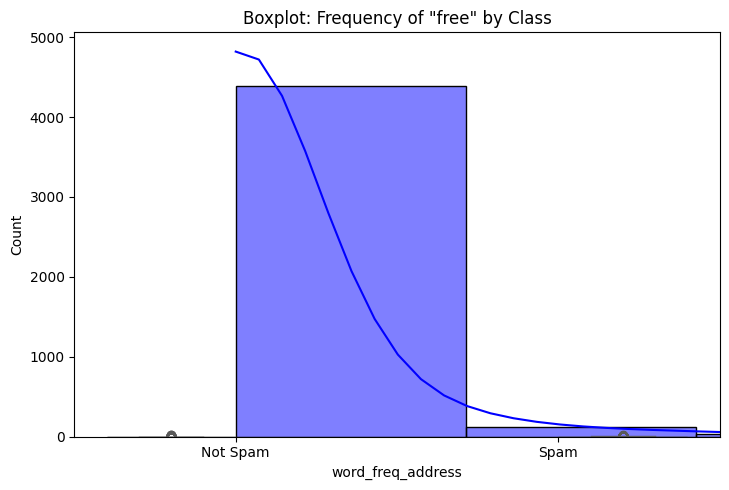

In [8]:
print("--- Visualizing Feature Distributions ---")

plt.figure(figsize=(14, 5))

# 1. Histogram (Requirement: histogram)
plt.subplot(1, 2, 1)
sns.histplot(df['word_freq_address'], bins=20, kde=True, color='blue')
plt.title('Histogram: Distribution of word_freq_address')

# 2. Boxplot (Requirement: boxplot)
# FIXED: Assigned 'Spam_Label' to 'hue' and set 'legend=False' to satisfy new Seaborn rules
sns.boxplot(x='Spam_Label', y='word_freq_free', data=df, hue='Spam_Label', palette='Set2', legend=False)
plt.title('Boxplot: Frequency of "free" by Class')

plt.tight_layout()
plt.show()

--- Visualizing Relationships & Counts ---


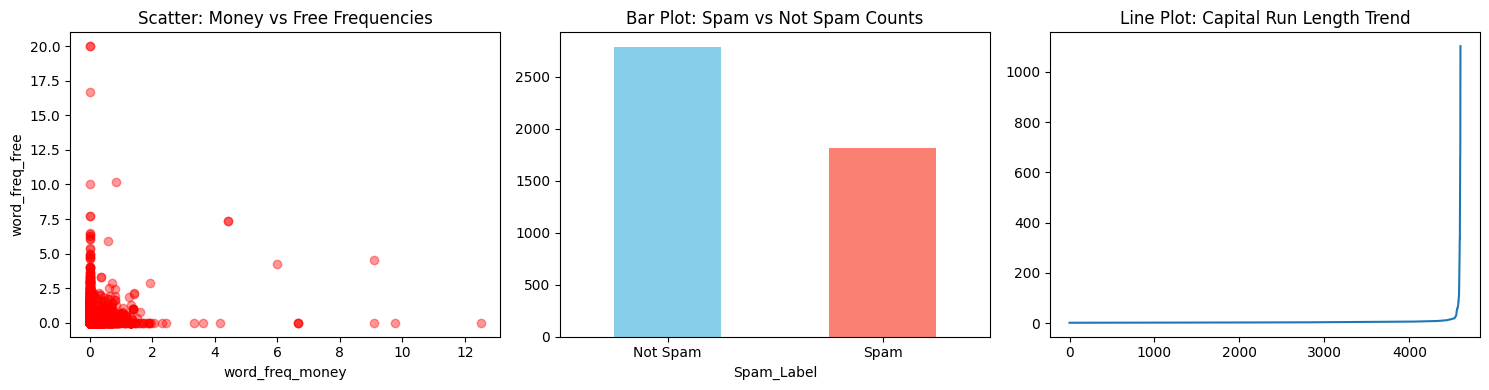

In [9]:
print("--- Visualizing Relationships & Counts ---")

plt.figure(figsize=(15, 4))

# 3. Scatter Plot (Requirement: scatter)
plt.subplot(1, 3, 1)
plt.scatter(df['word_freq_money'], df['word_freq_free'], alpha=0.4, c='red')
plt.title('Scatter: Money vs Free Frequencies')
plt.xlabel('word_freq_money')
plt.ylabel('word_freq_free')

# 4. Bar Plot (Requirement: bar)
plt.subplot(1, 3, 2)
df['Spam_Label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Bar Plot: Spam vs Not Spam Counts')
plt.xticks(rotation=0) # Keeps labels horizontal

# 5. Line Plot (Requirement: line)
plt.subplot(1, 3, 3)
df['capital_run_length_average'].sort_values().reset_index(drop=True).plot(kind='line')
plt.title('Line Plot: Capital Run Length Trend')

plt.tight_layout()
plt.show()

### **Conclusion:**
The Spambase dataset was successfully cleaned and preprocessed. Through visualization, we observed that certain words like 'free' and 'money' have significantly higher frequencies in spam emails compared to non-spam. The preprocessing pipeline, including null handling and type conversion, ensures the data is ready for model training.